# Traitement automatique des données Poids (Withings HealthMate),
# Food (MyFitnessPal), et Exercices (Polar)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from zipfile import ZipFile

import datetime
import json
import re
import shutil

from tqdm import tqdm

import seaborn as sns

import ipywidgets
import os

In [2]:
# ici, aller chercher dans Download
# les fichiers commençant par data-user... , data_BEN..., etc.
# repérer les plus récents (= derniers downloads)
# et copier ces plus récents dans imports avec le nom qui va bien

# voir :
# os.listdir : liste fichiers
# os.stat_result : donne infos sur fichier x (dont date dernière modif)
# shutil.copy : copie fichier endroit X à l'endroit Y

downloads_rep = "/home/benjamin/Downloads/"
liste_downloaded_files = os.listdir(downloads_rep)

if len(liste_downloaded_files) == 0:
    raise NameError(f"Aucun fichier n'est présent dans {downloads_rep}")

In [3]:
from lib.dataeng import Etl

2024-01-26 18:57:56.490813: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
etl = Etl()
etl.repo

'/home/benjamin/Downloads/'

In [5]:
df = etl.extract_poids() # extrait toutes les mesures de poids

Le fichier poids le plus récent est : data_BEN_1706264904.zip, parmi :

data_BEN_1706083174.zip
data_BEN_1706264904.zip
data_BEN_1705987381.zip
data_BEN_1706158812.zip


In [6]:
df_weight = df.groupby(['Date']).mean()

In [7]:
df_weight.tail(15)

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR
Date,,,,,,,
2024-01-12,72.764167,12.117500,3.031667,57.597500,40.711667,0.166531,1679.968000
2024-01-13,72.566667,12.447500,3.003333,57.100833,40.158333,0.171532,1668.574000
2024-01-14,72.564167,12.331667,3.012500,57.208333,40.284167,0.169941,1671.022000
2024-01-15,72.333333,12.560833,2.985833,56.770833,39.819167,0.173649,1661.086000
2024-01-16,72.593333,12.503333,3.002500,57.072500,40.121667,0.172237,1667.944000
2024-01-17,72.378462,12.340769,3.000000,57.022308,40.098462,0.170503,1666.814154
2024-01-18,73.055000,12.607500,3.020000,57.414167,40.441667,0.172574,1675.666000
2024-01-19,72.494167,12.419167,3.002500,57.056667,40.122500,0.171311,1667.620000
2024-01-20,72.846667,12.586667,3.010833,57.232500,40.268333,0.172782,1671.616000


In [8]:
df_weight.rolling(window=7).mean().tail(15)

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR
Date,,,,,,,
2024-01-12,72.798024,12.422595,3.017238,57.343095,40.406310,0.170640,1674.109257
2024-01-13,72.748738,12.351524,3.018548,57.363690,40.435595,0.169782,1674.579829
2024-01-14,72.751952,12.365452,3.018310,57.353571,40.422976,0.169966,1674.348400
2024-01-15,72.688619,12.396286,3.013548,57.264405,40.330238,0.170541,1672.314400
2024-01-16,72.705095,12.423476,3.012762,57.254476,40.316048,0.170877,1672.082971
2024-01-17,72.637161,12.399158,3.010476,57.212949,40.278828,0.170702,1671.140879
2024-01-18,72.607875,12.415586,3.007976,57.169496,40.233590,0.170995,1670.153451
2024-01-19,72.569304,12.458681,3.003810,57.092234,40.149423,0.171678,1668.389451
2024-01-20,72.609304,12.478562,3.004881,57.111044,40.165137,0.171857,1668.824022


In [9]:
df = etl.extract_food()  # calories par jour par repas

Le fichier food le plus récent est : File-Export-2020-08-03-to-2024-01-26.zip, parmi 

File-Export-2020-08-03-to-2024-01-26.zip
File-Export-2020-08-03-to-2024-01-24.zip
File-Export-2020-08-03-to-2024-01-25.zip
File-Export-2020-08-03-to-2024-01-23.zip


In [10]:
df

,Date,Meal,Calories,Lipides,Glucides,Proteines
0,2020-08-03,Breakfast,621.4,27.9,69.7,22.4
1,2020-08-03,Dinner,581.6,20.4,84.5,17.1
2,2020-08-03,Lunch,656.0,41.4,26.6,33.5
3,2020-08-03,Snacks,58.0,0.0,14.0,0.0
4,2020-08-04,Breakfast,1111.6,49.0,137.8,34.3
...,...,...,...,...,...,...
3692,2024-01-24,Dinner,243.9,6.1,40.6,9.4
3693,2024-01-24,Lunch,694.3,9.7,79.1,75.8
3694,2024-01-25,Breakfast,742.7,14.9,59.4,102.4
3695,2024-01-25,Dinner,365.6,5.8,49.9,27.4


In [11]:
df_food = df.groupby(['Date']).sum(numeric_only=True)

In [12]:
df_food.tail(15)

,Calories,Lipides,Glucides,Proteines
Date,,,,
2024-01-11,1705.0,42.6,142.0,174.9
2024-01-12,1747.2,37.4,170.3,191.1
2024-01-13,1702.5,34.2,139.2,218.6
2024-01-14,1718.3,36.3,180.6,160.5
2024-01-15,1684.4,21.5,186.3,189.9
2024-01-16,1655.6,56.8,153.3,141.7
2024-01-17,1637.2,29.5,174.6,183.0
2024-01-18,1661.5,41.4,124.4,194.5
2024-01-19,1671.0,37.5,153.5,187.8


In [13]:
df = etl.extract_exos()

Le fichier exercices le plus récent est : polar-user-data-export_12baa4ce-79a5-40f8-ad40-74308f7c2c26.zip, parmi :

polar-user-data-export_872b7f7c-c5e0-4b44-b031-f8e8821babae.zip
polar-user-data-export_12baa4ce-79a5-40f8-ad40-74308f7c2c26.zip


100%|██████████| 1828/1828 [01:28<00:00, 20.67it/s]


start date = 2021-03-29


In [14]:
df

,exo_duree,exo_type,exo_cals_bruts
exo_date,,,
2021-03-29,3220.826,STRENGTH_TRAINING,328.0
2021-03-30,2818.678,RUNNING,449.0
2021-03-31,3186.236,STRENGTH_TRAINING,272.0
2021-04-01,0.000,0,0.0
2021-04-02,0.000,0,0.0
...,...,...,...
2024-01-21,1980.000,INDOOR_ROWING,336.0
2024-01-22,3180.000,STRENGTH_TRAINING,369.0
2024-01-23,0.000,0,0.0


In [15]:
df_exos_total = df.groupby(['exo_date']).sum(numeric_only=True)

In [16]:
df_exos_total.tail(15)

,exo_duree,exo_cals_bruts
exo_date,,
2024-01-11,3240.0,258.0
2024-01-12,3120.0,454.0
2024-01-13,0.0,0.0
2024-01-14,2160.0,187.0
2024-01-15,3360.0,411.0
2024-01-16,3000.0,454.0
2024-01-17,1920.0,202.0
2024-01-18,0.0,0.0
2024-01-19,3480.0,399.0


In [17]:
df_exos_total.rolling(window=7).mean().tail(15)

,exo_duree,exo_cals_bruts
exo_date,,
2024-01-11,2503.025286,221.285714
2024-01-12,2631.511429,257.285714
2024-01-13,2631.511429,257.285714
2024-01-14,2477.142857,242.428571
2024-01-15,2502.857143,243.571429
2024-01-16,2640.000000,280.571429
2024-01-17,2400.000000,280.857143
2024-01-18,1937.142857,244.000000
2024-01-19,1988.571429,236.142857


In [18]:
df_all = pd.concat( [df_weight, df_food, df_exos_total], axis=1 ).sort_index()

# remplace les NaN dans les colonnes exercice par 0.0 : jour sans exercice
df_all['exo_duree'].fillna(0.0, inplace=True)
df_all['exo_cals_bruts'].fillna(0.0, inplace=True)

# drop les jours où il manque des données autres que les exercices
subset = ['Masse_Totale', 'Masse_Grasse', 'Calories']
df_all.dropna(subset = subset, inplace=True)

In [19]:
def exo_cals_nets(bmr, exo_duree, exo_cals_bruts):
    if exo_cals_bruts > 0:
        ecn = exo_cals_bruts - bmr / (24*60*60) * exo_duree
    else:
        ecn = 0.0
        
    return ecn

df_all['exo_cals_nets'] = np.where(df_all['exo_cals_bruts'] > 0, df_all['exo_cals_bruts'] - df_all['BMR'] / (24*60*60) * df_all['exo_duree'], 0 )

In [20]:
df_all['Depense_cal_totale'] = df_all['BMR'] + df_all['exo_cals_nets']
df_all['cal_deficit'] = df_all['Calories'] - (df_all['BMR'] + df_all['exo_cals_nets'])

In [21]:
# df_all.head(20)
# df_all.describe(include='all')
# df_all.info()

In [22]:
df_all.tail(15)

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR,Calories,Lipides,Glucides,Proteines,exo_duree,exo_cals_bruts,exo_cals_nets,Depense_cal_totale,cal_deficit
2024-01-11,73.260000,12.492500,3.037500,57.718333,40.758333,0.170522,1682.578000,1705.0,42.6,142.0,174.9,3240.0,258.0,194.903325,1877.481325,-172.481325
2024-01-12,72.764167,12.117500,3.031667,57.597500,40.711667,0.166531,1679.968000,1747.2,37.4,170.3,191.1,3120.0,454.0,393.334489,2073.302489,-326.102489
2024-01-13,72.566667,12.447500,3.003333,57.100833,40.158333,0.171532,1668.574000,1702.5,34.2,139.2,218.6,0.0,0.0,0.000000,1668.574000,33.926000
2024-01-14,72.564167,12.331667,3.012500,57.208333,40.284167,0.169941,1671.022000,1718.3,36.3,180.6,160.5,2160.0,187.0,145.224450,1816.246450,-97.946450
2024-01-15,72.333333,12.560833,2.985833,56.770833,39.819167,0.173649,1661.086000,1684.4,21.5,186.3,189.9,3360.0,411.0,346.402211,2007.488211,-323.088211
2024-01-16,72.593333,12.503333,3.002500,57.072500,40.121667,0.172237,1667.944000,1655.6,56.8,153.3,141.7,3000.0,454.0,396.085278,2064.029278,-408.429278
2024-01-17,72.378462,12.340769,3.000000,57.022308,40.098462,0.170503,1666.814154,1637.2,29.5,174.6,183.0,1920.0,202.0,164.959685,1831.773839,-194.573839
2024-01-18,73.055000,12.607500,3.020000,57.414167,40.441667,0.172574,1675.666000,1661.5,41.4,124.4,194.5,0.0,0.0,0.000000,1675.666000,-14.166000
2024-01-19,72.494167,12.419167,3.002500,57.056667,40.122500,0.171311,1667.620000,1671.0,37.5,153.5,187.8,3480.0,399.0,331.831972,1999.451972,-328.451972
2024-01-20,72.846667,12.586667,3.010833,57.232500,40.268333,0.172782,1671.616000,1771.0,64.7,133.0,168.3,3240.0,478.0,415.314400,2086.930400,-315.930400


In [23]:
file_save = os.getcwd() + "/data/dataset.csv"

with open(file_save, 'w') as f:
    df_all.to_csv(file_save)

In [24]:
df_all.rolling(window=15).mean().tail(15)

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR,Calories,Lipides,Glucides,Proteines,exo_duree,exo_cals_bruts,exo_cals_nets,Depense_cal_totale,cal_deficit
2024-01-11,73.275562,12.596945,3.032944,57.630525,40.676890,0.171935,1680.658109,2010.246667,62.073333,196.706667,159.233333,2209.206000,214.733333,171.862018,1852.520127,157.726539
2024-01-12,73.280951,12.598168,3.033222,57.634359,40.680501,0.171940,1680.748109,1967.046667,58.120000,187.306667,167.293333,2417.206000,245.000000,198.084318,1878.832427,88.214240
2024-01-13,73.245395,12.575068,3.032778,57.622547,40.672257,0.171707,1680.479069,1829.440000,50.720000,163.673333,173.273333,2205.167067,228.733333,185.922493,1866.401562,-36.961562
2024-01-14,73.122739,12.518845,3.029878,57.559236,40.619468,0.171232,1679.044109,1831.986667,49.920000,166.066667,173.453333,2237.119067,223.800000,180.399105,1859.443214,-27.456547
2024-01-15,73.031962,12.518845,3.025267,57.473014,40.534690,0.171446,1677.083309,1756.080000,44.933333,163.660000,174.280000,2060.722200,206.466667,166.593397,1843.676706,-87.596706
2024-01-16,72.866739,12.574068,3.012767,57.265070,40.308245,0.172560,1672.321709,1695.193333,43.806667,156.213333,172.826667,2260.722200,236.733333,192.999082,1865.320791,-170.127458
2024-01-17,72.742081,12.561563,3.006989,57.158335,40.204810,0.172678,1669.899186,1694.640000,43.840000,158.680000,170.680000,2388.722200,250.200000,203.996395,1873.895581,-179.255581
2024-01-18,72.720815,12.529797,3.007656,57.168279,40.218787,0.172295,1670.125986,1704.340000,44.013333,159.606667,171.833333,2180.158667,233.466667,191.299789,1861.425775,-157.085775
2024-01-19,72.708486,12.491196,3.009156,57.193087,40.247742,0.171793,1670.693477,1713.020000,43.533333,161.073333,173.733333,2304.078467,243.733333,199.164012,1869.857489,-156.837489
2024-01-20,72.694531,12.450374,3.010544,57.218654,40.277231,0.171267,1671.273797,1720.666667,45.806667,157.500000,173.093333,2372.038667,262.133333,216.234243,1887.508040,-166.841374


## Visual Management et Prédictions Bayesiennes

In [25]:
columns_to_keep = ['Masse_Totale', 'Masse_Grasse', 'Masse_Musculaire', 'BMR', 'Calories', 'exo_cals_nets']

df_mg = df_all[columns_to_keep].copy()

df_mg['next_day_MT'] = df_mg['Masse_Totale'].shift(-1)
df_mg['next_day_MG'] = df_mg['Masse_Grasse'].shift(-1)
df_mg['next_day_MM'] = df_mg['Masse_Musculaire'].shift(-1)

df_mg['Proxy_Cal_Def'] = df_mg['Calories'] - df_mg['BMR'] - df_mg['exo_cals_nets']

df_mg.dropna(inplace=True)

start_date = datetime.date(year=2023, month=3, day= 1) # '2021-04-01' - début enregistrement masse musculaire en mars 2023
# end_date = '2023-12-31'

df_mg = df_mg.loc[(df_mg.index >= start_date)] # & (df_mg.index <= end_date)]

df_mg['var_MT'] = (df_mg['next_day_MT'] - df_mg['Masse_Totale']).copy()
df_mg['var_MG'] = (df_mg['next_day_MG'] - df_mg['Masse_Grasse']).copy()
df_mg['var_MM'] = (df_mg['next_day_MM'] - df_mg['Masse_Musculaire']).copy()

df_mg.drop(columns=['next_day_MT', 'next_day_MG', 'next_day_MM'], inplace=True)

df_mg

,Masse_Totale,Masse_Grasse,Masse_Musculaire,BMR,Calories,exo_cals_nets,Proxy_Cal_Def,var_MT,var_MG,var_MM
2023-03-04,70.656667,11.420000,56.258333,1649.512000,2271.1,0.000000,621.588000,1.223333,0.428571,0.755952
2023-03-05,71.880000,11.848571,57.014286,1666.678857,1774.3,353.867654,-246.246512,-0.850000,-0.924571,0.067714
2023-03-06,71.030000,10.924000,57.082000,1668.289600,1759.7,498.562450,-407.152050,1.155000,0.202667,0.904667
2023-03-07,72.185000,11.126667,57.986667,1688.860000,2516.4,979.099745,-151.559745,0.098333,-0.948333,0.970000
2023-03-08,72.283333,10.178333,58.956667,1711.468000,1658.9,336.012941,-388.580941,-0.124762,-0.044048,-0.073810
...,...,...,...,...,...,...,...,...,...,...
2024-01-20,72.846667,12.586667,57.232500,1671.616000,1771.0,415.314400,-315.930400,-0.302500,0.031667,-0.316667
2024-01-21,72.544167,12.618333,56.915833,1664.398000,2014.0,297.857546,51.744454,-0.220000,-0.616667,0.374167
2024-01-22,72.324167,12.001667,57.290000,1672.966000,1714.6,307.425557,-265.791557,0.315833,0.189167,0.123333
2024-01-23,72.640000,12.190833,57.413333,1675.702000,1656.9,0.000000,-18.802000,0.224167,0.118333,0.099167


In [26]:
food_intake = 1700.0
exos_avg = 250.0

data_columns = [ 'Masse_Totale', 'Masse_Grasse', 'MG%', 'Masse_Musculaire' ]

horizon_past = 30 # nb jours dans le passé
horizon_futur = 30 # nb jours projection

In [27]:
# list_columns = ['Masse_Totale', 'Masse_Grasse', 'BMR', 'Calories', 'exo_cals_nets', 'Proxy_Cal_Def']
# list_columns =['BMR', 'Calories', 'exo_cals_nets', 'Proxy_Cal_Def']
list_columns =['Calories', 'exo_cals_nets', ]
X = df_mg[list_columns].to_numpy()

# y's
y = {}
y['Masse_Totale'] = df_mg['var_MT'].to_numpy()
y['Masse_Grasse'] = df_mg['var_MG'].to_numpy()
y['Masse_Musculaire'] = df_mg['var_MM'].to_numpy()

# modeles
modeles={}
scores={}
noises={}
daily_delta ={}

for name in [ 'Masse_Totale', 'Masse_Musculaire', 'Masse_Grasse']:
    brr = linear_model.BayesianRidge()
    brr.fit(X, y[name])
    modeles[name] = brr
    scores[name] = brr.score(X, y[name])
    noises[name] = np.sqrt(1/brr.alpha_)
    daily_delta[name] = brr.intercept_ + brr.coef_[0] * food_intake + brr.coef_[1] * exos_avg
    print(f'modele = {name}; score = {scores[name]}; noise = {noises[name]}; daily_delta = {daily_delta[name]}')
    
scores['MG%'] = 'n:a'

best_ever_mgp = np.min(df_all['MG%'])
date_best_ever_mgp = df_all['MG%'].idxmin()
print(f'Best ever MG% = {best_ever_mgp*100:.1f}% le {date_best_ever_mgp}')

best_ever_mg = np.min(df_all['Masse_Grasse'])
date_best_ever_mg = df_all['Masse_Grasse'].idxmin()
print(f'Best ever MG = {best_ever_mg:.1f}kg le {date_best_ever_mg}')

modele = Masse_Totale; score = 0.24168965704097967; noise = 0.6838635200329864; daily_delta = -0.1474117353893056
modele = Masse_Musculaire; score = 0.07520544867143142; noise = 0.7410441600978712; daily_delta = -0.07810987563876809
modele = Masse_Grasse; score = 0.15649324479382565; noise = 0.42803721742218; daily_delta = -0.06565732841154007
Best ever MG% = 11.3% le 2021-10-04
Best ever MG = 7.5kg le 2021-10-04


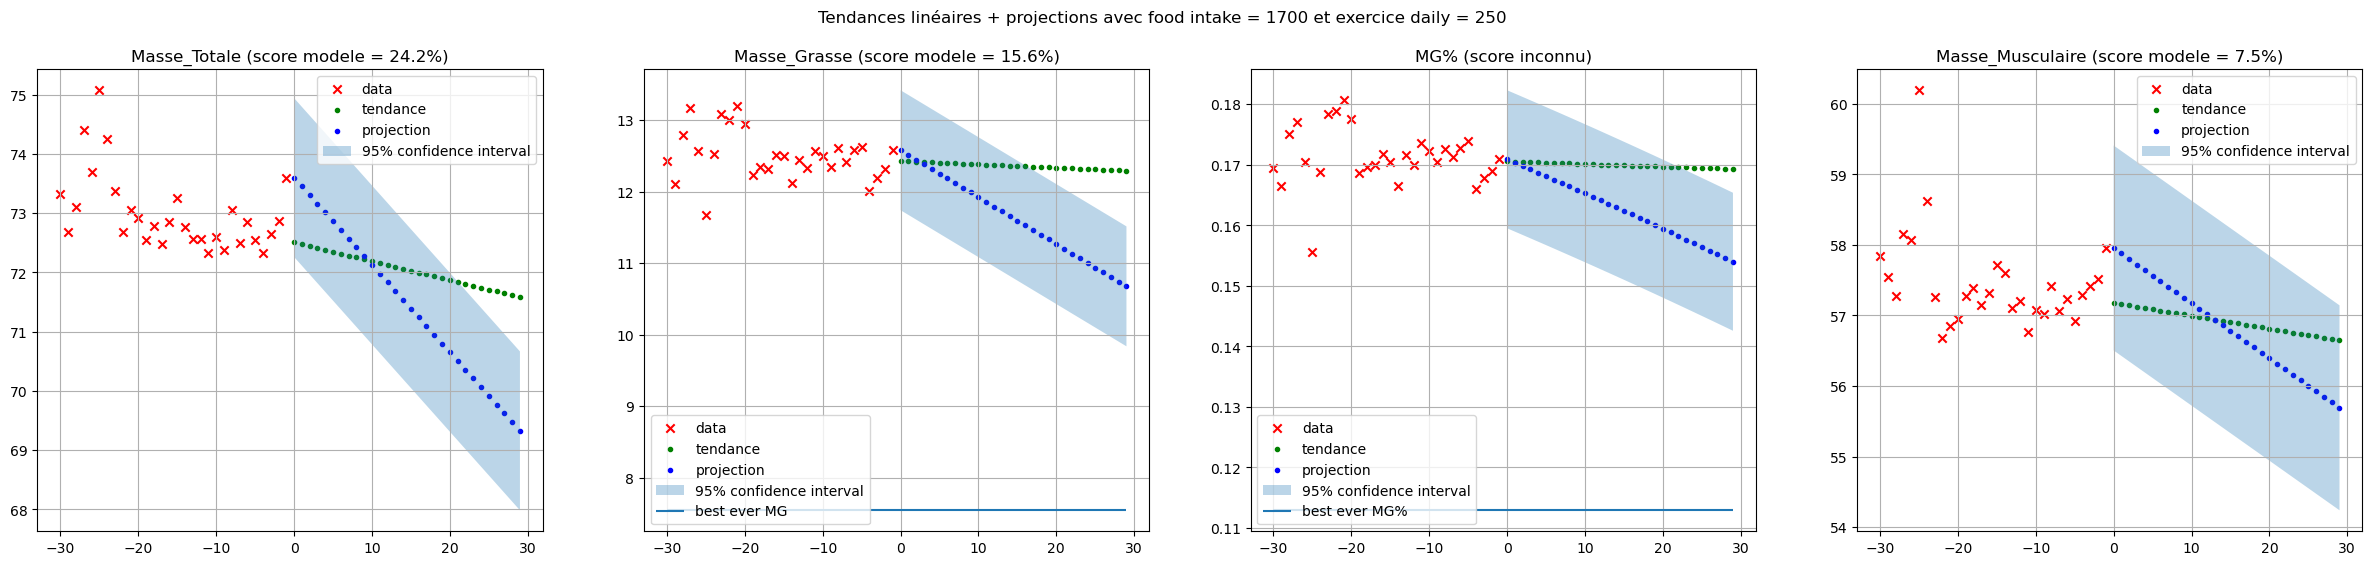

In [28]:
# Indicateurs Masse Totale, Masse Grasse, MG%, Masse Musculaire

X_past = np.array( [i for i in range(-horizon_past,0)] )
X_futur = np.array( [i for i in range(horizon_futur)] )
X = np.array([i for i in range(-horizon_past, horizon_futur)])

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(30,6))

for i, name in enumerate(data_columns):
    
    # tendances
    brr = linear_model.BayesianRidge()
    # brr.intercept_ + brr.coef_[0] * food_intake + brr.coef_[1] * exos_avg
    data_past = df_all[name][-horizon_past:].to_numpy()
    brr.fit( X_past.reshape(-1,1), data_past )
    
    data_futur = brr.predict(X_futur.reshape(-1,1))
    
    std = np.sqrt(1/brr.alpha_)
   
    axs[i].scatter(X_past, data_past, marker='x', color='red', label='data')
    axs[i].scatter(X_futur, data_futur, marker='.', color='green', label='tendance')
    if name=='MG%':
        titre = name + ' (score inconnu)'
    else:
        titre = name + ' (score modele = ' + f'{scores[name]*100:.1f}%)'
    axs[i].set_title(titre)
    axs[i].grid(True)
    
    # predictions avec hypothèses food intake et exercices
    if name=='MG%':
        y_pred_mt = np.array([ df_all['Masse_Totale'][-1] + X_futur * daily_delta['Masse_Totale'] ]).reshape(-1,1)
        y_pred_mg = np.array([ df_all['Masse_Grasse'][-1] + X_futur * daily_delta['Masse_Grasse'] ]).reshape(-1,1)
        y_pred = np.array([ y_pred_mg[j] / y_pred_mt[j] for j in list(X_futur)]).reshape(-1,1)
        axs[i].scatter(X_futur, y_pred, marker = '.', label='projection', color='blue')
        y_std = np.array(noises['Masse_Grasse'] / df_all['Masse_Totale'][-1])  # estime une std sur MG%
    else:
        last_y = data_past[-1]
        dd = daily_delta[name]
        y_pred = np.array([ last_y + X_futur * dd ]).reshape(-1,1)
        axs[i].scatter(X_futur, y_pred, marker = '.', label='projection', color='blue')
        y_std = noises[name]
    
    y_min = np.squeeze(y_pred - 1.96 * y_std)
    y_max = np.squeeze(y_pred + 1.96 * y_std)
    axs[i].fill_between(
        X_futur,
        y_min,
        y_max,
        alpha=0.3,
        label=r"95% confidence interval",
    )
    
    if name=='MG%':
        axs[i].hlines(best_ever_mgp, xmin=X_past[0], xmax=X_futur[-1], label = 'best ever MG%')
    if name=='Masse_Grasse':
        axs[i].hlines(best_ever_mg, xmin=X_past[0], xmax=X_futur[-1], label = 'best ever MG')
        
    axs[i].legend()
    
fig.suptitle(f'Tendances linéaires + projections avec food intake = {food_intake:.0f} et exercice daily = {exos_avg:.0f}')

plt.show()

In [29]:
MAX_CAL = 1700.0
PERIODE = 45
n_jours = 15
target = (MAX_CAL*PERIODE - df_food['Calories'][n_jours-PERIODE:].sum())/n_jours
avg = df_food['Calories'][n_jours-PERIODE:].mean()

print(f'Moyenne {PERIODE-n_jours} derniers jours = {avg:.0f} kcals/jour')
print(f'Target quotidienne sur les {n_jours} prochains jours pour tenir {MAX_CAL:.0f} kcals quotidiennes = {target:.0f} kcals/jour')

Moyenne 30 derniers jours = 1866 kcals/jour
Target quotidienne sur les 15 prochains jours pour tenir 1700 kcals quotidiennes = 1368 kcals/jour


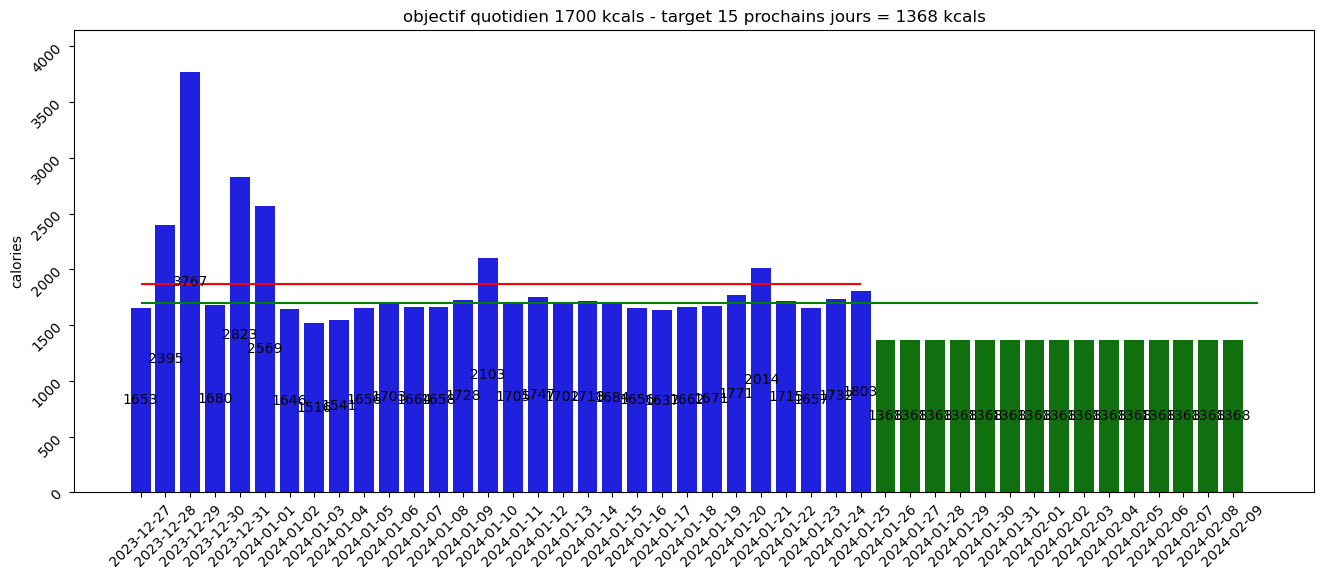

In [30]:
# plot data
fig, ax = plt.subplots(figsize=(16, 6))

tick_label = list(df_food.index[n_jours-PERIODE:]) + [ df_food.index[-1] + datetime.timedelta(days=d) for d in range(1,n_jours+1 )]
listcals = list(df_food['Calories'][n_jours-PERIODE:]) + [ target ] * n_jours

colors = [ 'blue'] * (PERIODE-n_jours) + ['green'] * n_jours
sns.barplot(x=tick_label, y=listcals, ax=ax, palette=colors)

# annotate
ax.bar_label(ax.containers[0], label_type='center', fmt="%.0f")
ax.tick_params(labelrotation=45)

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

ax.set_ylabel('calories')
ax.set_title(f'objectif quotidien {MAX_CAL:.0f} kcals - target {n_jours} prochains jours = {target:.0f} kcals')

ax.hlines(y=avg, xmin=0, xmax=PERIODE-n_jours-1, colors=['red'])
ax.hlines(y=MAX_CAL, xmin=0, xmax=PERIODE, colors=['green'])

plt.show()

# Graphes

In [31]:
vars = ['Masse_Grasse', 'MG%', 'Calories', 'Masse_Musculaire'] # 'Masse_Grasse', 'BMR', 'Masse_Totale', 'exo_cals_nets', 'Masse_Musculaire', 'cal_deficit',

dict_hlines = {
        'Calories' : [ (1600, 'green'), (1700, 'orange'), (1800, 'red') ],
        'cal_deficit' : [ (-500, 'green'), (-200, 'orange'), (200, 'red' ) ],
        'MG%' : [ (.14, 'green'), (.15, 'orange'), (.16,'red') ]
    }

In [32]:
def plot_general(longueur=15,
                 year=2023,
                 month=11,
                 day=1,
                #  vars = vars,
                #  dict_hlines = dict_hlines
):
    
    # vars = ['Masse_Totale', 'MG%', 'Calories', 'Depense_cal_totale', 'cal_deficit'] # 'Masse_Grasse', 'BMR',
    
    subset = ['Masse_Totale', 'Masse_Grasse'] # on permet des NaN en masse osseuse, etc en attendant d'avoir des data
    df_all2 = df_all.rolling(longueur).mean().dropna(subset = subset)
    start_date = datetime.date(year=year, month=month, day=day)

    df_all2 = df_all2[df_all2.index >= start_date]

    for v in vars:
        fig, ax = plt.subplots(figsize=(10,4))

        ax = sns.lineplot(data=df_all2, x=df_all2.index, y=v)
        ax.set_title(f"{v} (moyennes {longueur}j)") 
        ax.grid()
        ax.tick_params(axis='x', labelrotation=60)
        
        if v in dict_hlines:
            list_to_display = dict_hlines.get(v)
            for t in list_to_display:
                val = t[0]
                col = t[1]
                ax.axhline(y=val, color=col, lw=2.0)
        
    plt.plot()

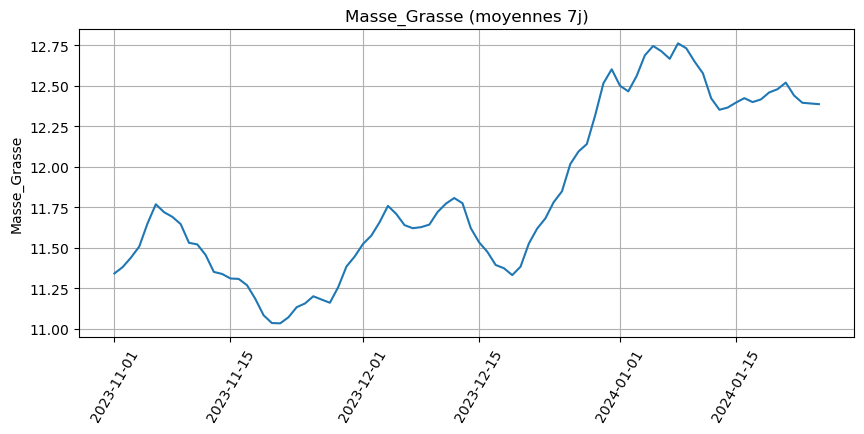

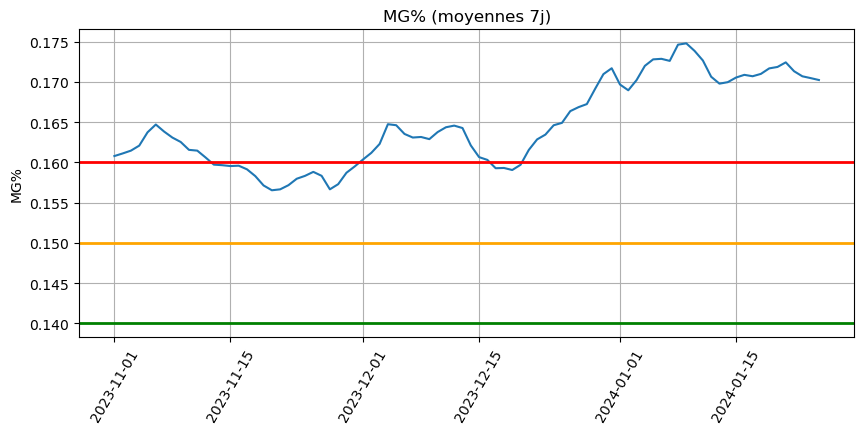

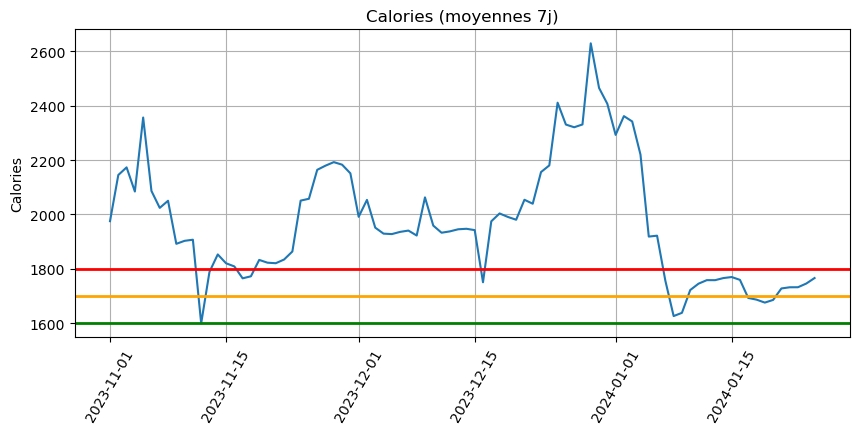

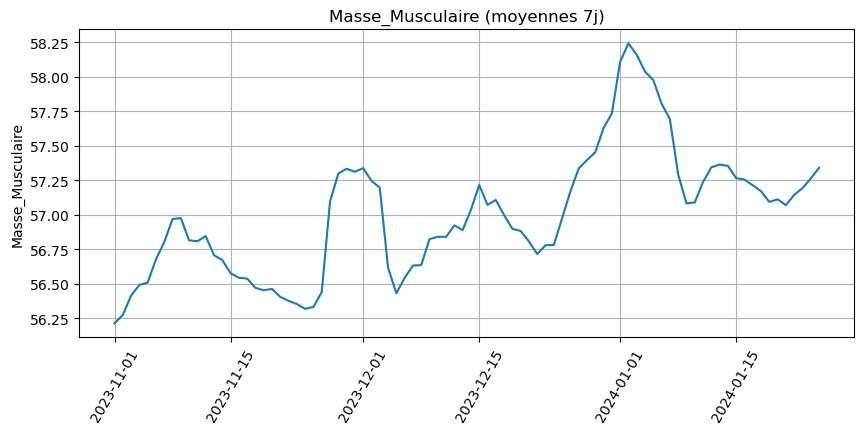

In [33]:
plot_general(longueur=7)

In [34]:
# vars = ['Masse_Grasse', 'MG%', 'Calories','Masse_Musculaire'] # 'Masse_Grasse', 'BMR', 'Masse_Totale', 'exo_cals_nets', 'Masse_Musculaire',  'cal_deficit', 

# ipywidgets.interact(plot_general, longueur=(1,90,7), year=(2020,2023,1), month=(1,12,1))

In [35]:
def plot_general2(longueur=15,
                 year=2023,
                 month=9,
                 day=1,
):
    # vars = ['Masse_Totale', 'MG%', 'BMR', 'Calories', 'cal_deficit']
    
    subset = ['Masse_Totale', 'Masse_Grasse'] # on permet des NaN en masse osseuse, etc en attendant d'avoir des data
    df_all2 = df_all.rolling(longueur).mean().dropna(subset = subset)
    start_date = datetime.date(year=year, month=month, day=day)

    df_all2 = df_all2[df_all2.index >= start_date]

    fig, ax = plt.subplots(figsize=(12,5))
    
    x = df_all2.index
    y1 = df_all2['MG%']
    ax.plot(y1, marker='.', color='red', label='MG%')
    ax.set_ylabel('MG%')
    ax.set_ylim(bottom=0.14, top=0.17)
    ax.tick_params(axis='x', labelrotation=60)
    ax.legend()
    ax.grid()
    
    y2 = df_all2['cal_deficit']
    ax2 = ax.twinx()
    ax2.plot(y2, marker='.', color='blue', label='cal_deficit')
    ax2.set_ylabel('cal_deficit')
    ax2.set_ylim(bottom=-400.0, top=500.0)
    # ax2.legend()

In [36]:
# ipywidgets.interact(plot_general2, longueur=(1,90,7), year=(2020,2023,1), month=(1,12,1), day=(1))

In [37]:
def plot_general3(longueur=15,
                 year=2023,
                 month=11,
                 day=1
):
    # vars = ['Masse_Totale', 'MG%', 'BMR', 'Calories', 'cal_deficit']
    
    subset = ['Masse_Totale', 'Masse_Grasse'] # on permet des NaN en masse osseuse, etc en attendant d'avoir des data
    df_all2 = df_all.rolling(longueur).mean().dropna(subset = subset)
    start_date = datetime.date(year=year, month=month, day=day)

    df_all2 = df_all2[df_all2.index >= start_date]

    fig, ax = plt.subplots(figsize=(12,5))
    
    x = df_all2.index
    y1 = df_all2['MG%']
    ax.plot(y1, marker='.', color='red', label='MG%')
    ax.set_ylabel('MG%')
    ax.set_ylim(bottom=0.14, top=0.17)
    ax.tick_params(axis='x', labelrotation=60)
    ax.legend()
    ax.grid()
    
    y2 = df_all2['Calories']
    ax2 = ax.twinx()
    ax2.plot(y2, marker='.', color='blue', label='cal_deficit')
    ax2.set_ylabel('Calories')
    ax2.set_ylim(bottom=1500.0, top=2500.0)
    # ax2.legend()

In [38]:
# ipywidgets.interact(plot_general3, longueur=(1,90,7), year=(2020,2023,1), month=(1,12,1), day=(1))

In [39]:
def scatter_plot(mass_interval=2.0, length=15):
    """Utility plot to scatter mass_delta over LENGTH vs average cal_deficit over LENGTH"""
    
    MASS_INTERVAL = mass_interval
    LENGTH = int(length)

    current_mass = df_all['Masse_Totale'].iloc[-1]

    df_corr = df_all[(df_all['Masse_Totale'] - current_mass) <= MASS_INTERVAL]
    df_corr = df_corr.drop(columns=['Masse_Osseuse', 'Masse_Musculaire', 'Masse_Hydrique']).copy()
    
    df_corr = df_corr.rolling(window=LENGTH).mean().dropna().copy()

    df_corr['Delta_Masse_Totale'] = (df_corr['Masse_Totale'] - df_corr['Masse_Totale'].shift(periods=LENGTH))/LENGTH*7

    df_corr.dropna(inplace=True)
    
    fig, ax = plt.subplots() #figsize=(8,8))
    cal = df_corr['cal_deficit'].to_numpy()
    delta = df_corr['Delta_Masse_Totale'].to_numpy()
    
    # print(delta)
    
    ax.scatter(x=cal, y=delta)
    ax.set_xlabel(f'average calorie deficit over {LENGTH} days')
    ax.set_ylabel(f'average weekly weight change (g) over {LENGTH} days')
    ax.grid()
    
    lr = LinearRegression()
    lr.fit(cal.reshape(-1,1), delta)
    x_cal = np.linspace(start=-500, stop=500, num=100)
    y_pred = lr.predict(x_cal.reshape(-1,1))
    
    ax.scatter(x_cal, y_pred, color='red', marker='.')
    

In [40]:
# ipywidgets.interact(scatter_plot, mass_interval=(1.0, 10.0, 0.5), length=(1, 30, 7))

In [41]:
def scatter_plot2(mass_interval=2.0, length=15):
    """Utility plot to scatter mass_delta over LENGTH vs average cal_deficit over LENGTH"""
    
    MASS_INTERVAL = mass_interval
    LENGTH = int(length)

    current_mass = df_all['Masse_Totale'].iloc[-1]

    df_corr = df_all[(df_all['Masse_Totale'] - current_mass) <= MASS_INTERVAL]
    df_corr = df_corr.drop(columns=['Masse_Osseuse', 'Masse_Musculaire', 'Masse_Hydrique']).copy()
    
    df_corr = df_corr.rolling(window=LENGTH).mean().dropna().copy()

    df_corr['Delta_Masse_Totale'] = (df_corr['Masse_Totale'] - df_corr['Masse_Totale'].shift(periods=LENGTH))/LENGTH*7

    df_corr.dropna(inplace=True)
    
    fig, ax = plt.subplots() #figsize=(8,8))
    cal = df_corr['Calories'].to_numpy()
    delta = df_corr['Delta_Masse_Totale'].to_numpy()
    
    ax.scatter(x=cal, y=delta)
    ax.set_xlabel(f'average calorie intake over {LENGTH} days')
    ax.set_ylabel(f'average weekly weight variation (g) over {LENGTH} days')
    ax.grid()
    
    lr = LinearRegression()
    lr.fit(cal.reshape(-1,1), delta)
    x_cal = np.linspace(start=1500, stop=2500, num=100)
    y_pred = lr.predict(x_cal.reshape(-1,1))
    
    ax.scatter(x_cal, y_pred, color='red', marker='.')

In [42]:
# ipywidgets.interact(scatter_plot2, mass_interval=(1.0, 10.0, 0.5), length=(1, 30, 7))

In [43]:
def scatter_plot3(mass_interval=5.0, length=15):
    """Utility plot to scatter mass_delta over LENGTH vs average cal_deficit over LENGTH"""
    
    MASS_INTERVAL = mass_interval
    LENGTH = int(length)

    current_mass = df_all['Masse_Totale'].iloc[-1]

    df_corr = df_all[(df_all['Masse_Totale'] - current_mass) <= MASS_INTERVAL]
    df_corr = df_corr.drop(columns=['Masse_Osseuse', 'Masse_Musculaire', 'Masse_Hydrique']).copy()
    
    df_corr = df_corr.rolling(window=LENGTH).mean().dropna().copy()

    df_corr['Delta_MG'] = (df_corr['Masse_Grasse'] - df_corr['Masse_Grasse'].shift(periods=LENGTH))/LENGTH*7

    df_corr.dropna(inplace=True)
    
    fig, ax = plt.subplots() #figsize=(8,8))
    cal = df_corr['Calories'].to_numpy()
    delta = df_corr['Delta_MG'].to_numpy()
    
    ax.scatter(x=cal, y=delta)
    ax.set_xlabel(f'average calorie intake over {LENGTH} days')
    ax.set_ylabel(f'average weekly fat mass variation over {LENGTH} days')
    ax.grid()
    
    lr = LinearRegression()
    lr.fit(cal.reshape(-1,1), delta)
    x_cal = np.linspace(start=1500, stop=2500, num=100)
    y_pred = lr.predict(x_cal.reshape(-1,1))
    
    ax.scatter(x_cal, y_pred, color='red', marker='.')

In [44]:
# ipywidgets.interact(scatter_plot3, mass_interval=(1.0, 10.0, 0.5), length=(1, 30, 7))